-----------------------

**Nome: Izabela Hammerschlag**


**Data: 27/09/23**

-----------------------

# Games - Projeto proposto pela Tripleten



--------------------

# Descrição do Projeto:

**Você trabalha para a loja online Ice, que vende videogames no mundo todo. As avaliações de usuários e especialistas, gêneros, plataformas (por exemplo, Xbox ou PlayStation) e dados históricos sobre vendas de jogos estão disponíveis em fontes abertas. Você precisa identificar padrões que determinam se um jogo tem sucesso ou não. Isso permitirá que você identifique potenciais grandes vencedores e planeje campanhas publicitárias.
Na sua frente estão dados que remontam a 2016. Vamos imaginar que estamos em dezembro de 2016 e você está planejando uma campanha para 2017.
O importante é ter experiência trabalhando com dados. Realmente não importa se você está prevendo as vendas de 2017 com base nos dados de 2016 ou as vendas de 2027 com base nos dados de 2026.)
O conjunto de dados contém a abreviatura ESRB. O Entertainment Software Rating Board avalia o conteúdo de um jogo e atribui uma classificação etária, como Adolescente ou Maduro.**

# Contents <a id='back'></a>

* [Introdução](#intro)
* [Visão geral dos dados](#visao)
* [Pré-processamento de dados](#pre)
* [Análise de dados](#analise)
* [Testando as hipóteses](#teste)
* [Conclusão geral](#conclusao)


## Introdução <a id='intro'></a>

A loja online Ice  vende videogames no mundo todo. Por isso, precisamos identificar padrões que determinam se um jogo tem sucesso ou não. Com o objetivo de identificar potenciais grandes vencedores para planejar campanhas publicitárias, vamos analisar os dados fornecidos do ano de 2016 para indicar o planejando para a campanhade vendas de 2017. Separamos o projeto da seguinte forma: visão geral dos dados, pré-processamento de dados, análise dos dados, teste de hipóteses e conclusões.

## Visão geral dos dados <a id='visao'></a>

Importando as bibliotecas necessárias para a execução do projeto

In [1]:
import pandas as pd # importando pandas como pd
import math # importando math
import numpy as np # importando Numpy com np
import matplotlib.pyplot as plt #importando matplotlib como plt
from scipy.stats import ttest_ind # importando ttest

In [2]:
# lendo o arquivo
df = pd.read_csv('./games.csv')
df.head(10) # exibindo 10 primeiras linhas do dataframe

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Primeiras impressões: podemos perceber que algumas colunas possuem dados faltantes, as colunas estão todas começando com letras maiúsculas. Os anos estão em formatação errada. Temos diversidade de anos de lançamentos dos jogos, plataformas, gêneros e nomes. 

In [3]:
df.info() # informações gerais

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Temos algumas colunas com dados ausentes e com Dtype incorreto. Vamos descobrir o total de valores nulos (ou valores ausentes) em cada coluna.

In [4]:
df.isna().sum() # verificando dados ausentes e somando os valores nulos para cada coluna

Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

Teremos que ver para quais jogos tem dados faltantes e se existe algum padrão, para depois decidir oque fazer com esses dados (se vamos substitui-los ou retira-los, por exemplo). Teremos que checar também se exitem dados duplicados, colocar as colunas para os tipos corretos e mudar os títulos das colunas para letras minúsculas (padrão). Com isso, vamos preparar os dados e deixa-los pronto para iniciar a análise.

## Pré-processamento de dados <a id='pre'></a>

Nesta etapa olharemos para cada parte do dataframe e faremos correções, formatações e substituições em todas as partes que forem necessárias.

In [5]:
df.columns # a lista dos nomes das colunas na tabela df

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower() # aplicando .lower() para cada index da coluna
print(df.columns) # verificando substituição

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')


Vamos olhar para cada coluna e verificar os valores, e ver se existem dados para serem corrigidos.


### coluna  `name`

In [7]:
df['name'].value_counts() # podemos perceber que existem jogos com nomes repetidos
                          # podem ter mesmos jogos  para variadas  plataformas

Need for Speed: Most Wanted                         12
Ratatouille                                          9
LEGO Marvel Super Heroes                             9
FIFA 14                                              9
Madden NFL 07                                        9
                                                    ..
Jewels of the Tropical Lost Island                   1
Sherlock Holmes and the Mystery of Osborne House     1
The King of Fighters '95 (CD)                        1
Megamind: Mega Team Unite                            1
Haitaka no Psychedelica                              1
Name: name, Length: 11559, dtype: int64

In [8]:
df[df['name'].isna()] # dados NaN em name

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [9]:
df = df.dropna(subset=['name'],axis=0) # vamos eliminar essas 2 linhas
df['name'].isna().sum() # verificando se eliminamos

0

A coluna name tinha apenas 2 dados sem nome, essas duas linhas foram deletadas pois além de não ter nome do jogo estavam com outras colunas NaN. Deletar esses dois não afeta a análise.

### coluna `platform`

In [10]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       27
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

Esta coluna não possue dados ausentes e os dados parecem estar coerentes.

### coluna `year_of_release`

In [11]:
df['year_of_release'].value_counts() #os valores estão em flotating ao invés de estar em inteiro.

2008.0    1427
2009.0    1426
2010.0    1255
2007.0    1197
2011.0    1136
2006.0    1006
2005.0     939
2002.0     829
2003.0     775
2004.0     762
2012.0     653
2015.0     606
2014.0     581
2013.0     544
2016.0     502
2001.0     482
1998.0     379
2000.0     350
1999.0     338
1997.0     289
1996.0     263
1995.0     219
1994.0     121
1993.0      60
1981.0      46
1992.0      43
1991.0      41
1982.0      36
1986.0      21
1989.0      17
1983.0      17
1990.0      16
1987.0      16
1988.0      15
1985.0      14
1984.0      14
1980.0       9
Name: year_of_release, dtype: int64

In [12]:
df['year_of_release'].isna().sum()

269

In [13]:
df[df['year_of_release'].isna()].head() # temos 269 linhas com dados faltantes em ano de lançamento

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


Teremos que substituir esses valores ausentes, uma alternativa seria agrupar `platform` e tirar a média de anos de lançamento para cada uma delas, e substituir de acordo com esses valores. Faremos isso a seguir:

In [14]:
df[~df['year_of_release'].isna()].groupby('platform')['year_of_release'].mean()

platform
2600    1982.137931
3DO     1994.666667
3DS     2013.126953
DC      1999.942308
DS      2008.185290
GB      1995.958763
GBA     2003.210851
GC      2003.400369
GEN     1993.037037
GG      1992.000000
N64     1998.531646
NES     1987.153061
NG      1994.500000
PC      2008.914316
PCFX    1996.000000
PS      1998.005882
PS2     2004.583921
PS3     2010.840735
PS4     2015.145408
PSP     2008.731769
PSV     2014.132867
SAT     1996.028902
SCD     1993.833333
SNES    1993.845188
TG16    1995.000000
WS      2000.000000
Wii     2008.966563
WiiU    2013.659864
X360    2009.880682
XB      2003.636364
XOne    2014.951417
Name: year_of_release, dtype: float64

In [15]:
df['year_of_release'] = df['year_of_release'].fillna(df.groupby('platform')['year_of_release'].transform('mean'))

# https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group

In [16]:
df['year_of_release'].isna().sum() # verificando se ainda exitem valores ausentes

0

### coluna `genre`

In [17]:
df['genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: genre, dtype: int64

In [18]:
df['genre'].isna().sum()

0

As duas linhas que estavam com dados ausentes na coluna 'genre' eram as mesmas da coluna name, por isso ja foi retirado.

### coluna `na_sales`

In [19]:
df['na_sales'].value_counts()

0.00     4507
0.02      576
0.03      561
0.04      549
0.01      545
         ... 
3.68        1
2.98        1
2.61        1
3.04        1
41.36       1
Name: na_sales, Length: 402, dtype: int64

In [20]:
df['na_sales'].isna().sum()

0

Nesta coluna tem 4507 linhas com 0.00 de vendas, ou seja, de jogos que não tiveram vendas. Esta coluna não possue dados ausentes.

### coluna `eu_sales`

In [21]:
df['eu_sales'].value_counts()

0.00     5869
0.01     1494
0.02     1308
0.03      926
0.04      709
         ... 
1.87        1
1.75        1
1.44        1
1.60        1
28.96       1
Name: eu_sales, Length: 307, dtype: int64

In [22]:
df['eu_sales'].isna().sum()

0

Nesta coluna tem 5870 linhas com 0.00 de vendas, ou seja, de jogos que não tiveram vendas. Esta coluna não possue dados ausentes.

### coluna `jp_sales`

In [23]:
df['jp_sales'].value_counts()

0.00    10513
0.02      741
0.01      706
0.03      545
0.04      397
        ...  
3.14        1
2.73        1
3.18        1
3.63        1
0.97        1
Name: jp_sales, Length: 244, dtype: int64

In [24]:
df['jp_sales'].isna().sum()

0

Nesta coluna tem 10513 linhas com 0.00 de vendas, ou seja de jogos que não tiveram vendas. Esta coluna não possue dados ausentes.

### coluna `other_sales`

In [25]:
df['other_sales'].value_counts()

0.00    6600
0.01    3464
0.02    1618
0.03     926
0.04     654
        ... 
2.11       1
7.53       1
1.21       1
1.79       1
0.93       1
Name: other_sales, Length: 155, dtype: int64

In [26]:
df['other_sales'].isna().sum()

0

Nesta coluna tem 6600 linhas com 0.00 de vendas, ou seja de jogos que não tiveram vendas. Esta coluna não possue dados ausentes.

### coluna `critic_score`

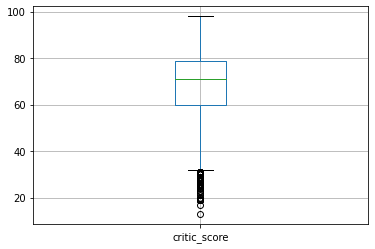

In [27]:
df.boxplot('critic_score');

In [28]:
df['critic_score'].value_counts()

70.0    256
71.0    254
75.0    245
78.0    240
73.0    238
       ... 
20.0      3
21.0      1
17.0      1
22.0      1
13.0      1
Name: critic_score, Length: 82, dtype: int64

In [29]:
df['critic_score'].isna().sum()

8576

In [30]:
df[df['critic_score'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN


Temos muitos dados ausentes nesta coluna (8576), antes de pensarmos em como tratar esses dados ausentes, vamos verificar se existe alguma relação com o total de vendas dos jogos com as críticas. 

Vamos criar uma nova coluna com a soma dos valores de venda dos jogos para todas as regiões:

In [31]:
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
 # coluna add total_sales

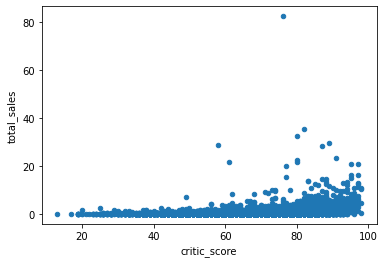

In [32]:
df.plot.scatter(x='critic_score', y='total_sales');

Através deste plot podemos ver uma leve tendencia a quanto maior o critic_score maior o total_sales. Claro que devemos verificar isto mais adiante.

Não podemos substituir os valores ausentes de 'critic_score' por médias ou medianas, por isso vamos utilizar como substituição a sigla 'UNK', que quer dizer que o valor é desconhecido (unknown).

In [33]:
def can_be_float(x):
    try:
        return float(x)
    except ValueError:
        return 'UNK'
# esta função pega os valores TBD e retorna UNK    
df['critic_score'] = df['critic_score'].apply(can_be_float).fillna('UNK')
# aplicando a funçao para a coluna, os valores NaN serão substituidos por UNK

Considerando que TBD são valores que ainda seriam determinados e que `NAN` também são desconhecidos, aqui substituimos todos por `Unknown`.

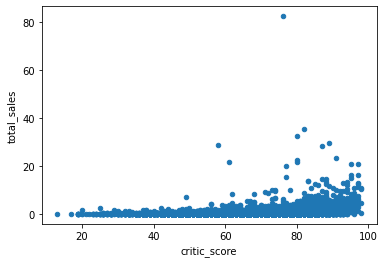

In [34]:
df[df['critic_score'] != 'UNK'].astype({'critic_score':float})\
    .plot.scatter(x='critic_score', y='total_sales');
# pegando para linhas onde o score da critica é determinada! (diferente de UNK)

Existe uma leve tendência a quanto maior o critic_score maior o total_sales.

### coluna `user_score`

In [35]:
df['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
1.1       2
1.9       2
9.6       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [36]:
df['user_score'].isna().sum()

6699

Podemos seguir a mesma linha de raciocínio da coluna anterior.

Não podemos substituir os valores ausentes por médias ou medianas, por isso vamos utilizar como substituição a sigla UNK, que quer dizer que o valor é desconhecido.

In [37]:
df['user_score'] = df['user_score'].apply(can_be_float).fillna('UNK')

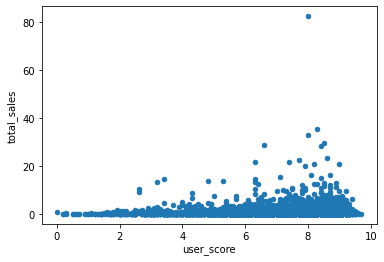

In [38]:
df[df['user_score'] != 'UNK'].astype({'user_score':float})\
    .plot.scatter(x='user_score', y='total_sales');

Aproveitando para verificar também que existe uma leve tendência a quanto maior o user_score maior o total_sales.

### coluna `rating`

In [39]:
df['rating'].value_counts() # valores são strings de classificação ESRB

E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

In [40]:
df['rating'].isna().sum() # tem 6764 NaN

6764

In [41]:
df['rating'] = df['rating'].fillna('UNK') 
#substituindo os dados ausentes como UNK = desconhecido

In [42]:
df['rating'].value_counts()

UNK     6764
E       3990
T       2961
M       1563
E10+    1420
EC         8
K-A        3
RP         3
AO         1
Name: rating, dtype: int64

No caso do rating substituimos todos `NaN` por `UNK`.

Agora que já verificamos todas as colunas vamos corrigir o Dtype e verificar se ainda há dados duplicados antes de começarmos com as análises.

**Corrigindo Dtype de colunas que estão com tipos incompativeis para os dados**

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16713 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     16713 non-null  object 
 9   user_score       16713 non-null  object 
 10  rating           16713 non-null  object 
 11  total_sales      16713 non-null  float64
dtypes: float64(6), object(6)
memory usage: 1.7+ MB


De acordo com o Dtype mostrando no info, percebemos que apenas year_of_realease está com o tipo de dado errado. Precisamos trocar de floating para inteiro.

In [44]:
# corrigindo os tipos de dados
df['year_of_release'] = df['year_of_release'].astype('int') 
# ano de lançamento de float para inteiro

In [45]:
df['year_of_release']

0        2006
1        1985
2        2008
3        2009
4        1996
         ... 
16710    2016
16711    2006
16712    2016
16713    2003
16714    2016
Name: year_of_release, Length: 16713, dtype: int64

**Verificando Duplicatas**

In [46]:
df.duplicated().sum()

0

Não temos dados duplicados neste dataframe.

## Análise dos dados <a id='analise'></a>

Agora vamos iniciar a análise dos dados para identificar as plataformas de jogos mais rentáveis.

Para iniciarmos a análise, vamos visualizar quantos jogos foram lançados em anos diferentes. 

In [47]:
df.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      53
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     220
1996     263
1997     289
1998     389
1999     338
2000     350
2001     482
2002     829
2003     821
2004     796
2005     939
2006    1006
2007    1197
2008    1524
2009    1456
2010    1280
2011    1136
2012     653
2013     552
2014     582
2015     606
2016     502
Name: name, dtype: int64

Podemos observar que depois de 1993 o número de jogos nas plataformas aumentarem significativamente. Tendo maiores números entre 2006 a 2011. Para melhor visualização vamos colocar estes dados no plot abaixo.

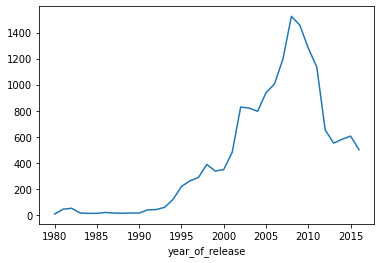

In [48]:
df.groupby('year_of_release')['name'].count().plot();
# agrupando ano de lançamento, e contando valores em name para cada um deles.

No plot acima podemos verificar que o número de jogos cresceu significativamente após 1995, tendo um pico em torno de 2008.

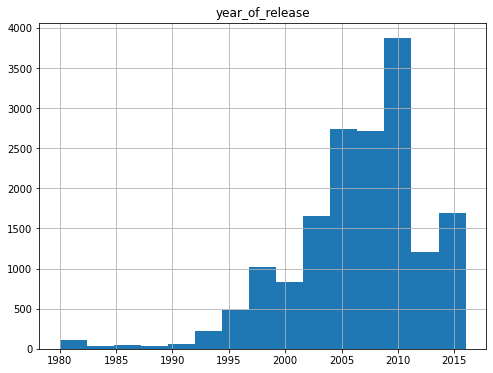

In [49]:
df.hist(column='year_of_release',range=(1980,2016),bins=15,figsize=(8,6));
# histograma da coluna year_of_release

Podemos também olhar para o histograma acima e verificar o número de ocorrência para cada ano através das barras. As barras mostram um crescimento após 1995.

Pensando nos variados tipos de plataformas, vamos verificar como as vendas variaram de plataforma para plataforma. Neste caso, vamos ver a soma total da rentabilidade de cada plataforma.

In [50]:
df.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
# agrupando plataformas e somando todos as vendas dos jogos destas plataformas.

platform
PS2     1255.77
X360     971.42
PS3      939.65
Wii      907.51
DS       806.12
PS       730.86
GBA      317.85
PS4      314.14
PSP      294.05
PC       259.52
3DS      259.00
XB       257.74
GB       255.46
NES      251.05
N64      218.68
SNES     200.04
GC       198.93
XOne     159.32
2600      96.98
WiiU      82.19
PSV       54.07
SAT       33.59
GEN       28.35
DC        15.95
SCD        1.86
NG         1.44
WS         1.42
TG16       0.16
3DO        0.10
GG         0.04
PCFX       0.03
Name: total_sales, dtype: float64

Tem plataformas muito rentáveis enquanto outras com valores total_sales baixos. É interessante neste projeto escolhermos as plataformas com maiores vendas.

Com isso, vamos escolher as plataformas com as maiores vendas totais e construir uma distribuição com base em dados para cada ano. Escolhemos as 6 primeiras mais rentáveis, abaixo da sexta posição (PS 730.86) os rendimentos cairam para menos que a metade (GBA 317.85) comparada com a plataforma acima.

In [51]:
top_platforms = df.groupby('platform')['total_sales'].sum()\
                   .sort_values(ascending=False).head(6).index.values
# pegamos as 6 primeiras com maior numero de vendas!

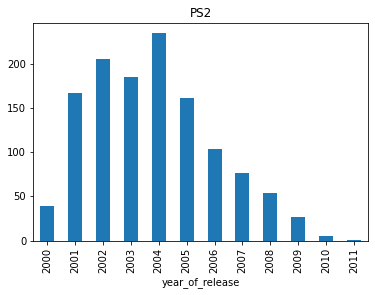

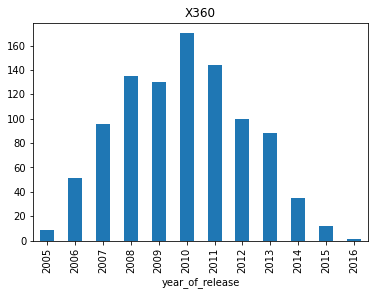

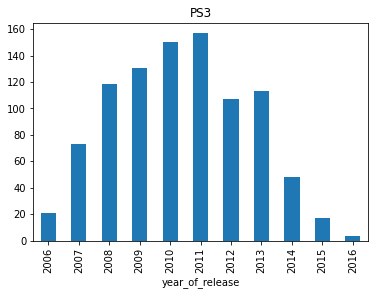

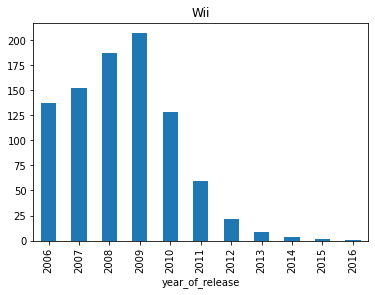

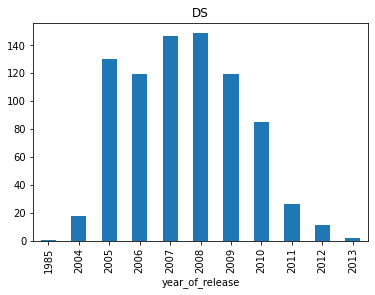

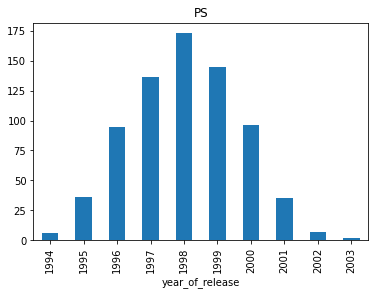

In [52]:
for platform in top_platforms:
    plt.figure()
    plt.title(platform)
    df[df['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot.bar()

Podemos perceber que todas tiveram um pico de vendas de jogos, depois começaram a cair. Provavelmente devido ao desuso de algumas dessas plataformas por conta de novas plataformas de jogos no mercado.

Vamos encontrar as plataformas que costumavam ser populares, mas agora não têm mais vendas e descobrir quanto tempo leva em média para as novas plataformas aparecerem e as antigas desaparecerem.

Abaixo vamos calcular o tempo de vida das plataformas pegando o valor mínimo e máximo dos anos de lançamento para cada uma delas:

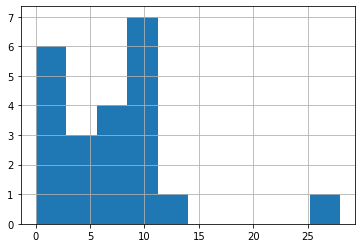

In [53]:
time_of_life = df.groupby('platform')['year_of_release'].agg(['min', 'max'])
time_of_life['total_time'] = time_of_life['max'] - time_of_life['min'] # tempo de vida
time_of_life[time_of_life['max'] < 2016]['total_time'].hist();

Pelo histograma podemos perceber a maioria leva de 0-10 anos

In [54]:
median = time_of_life[time_of_life['max'] < 2016]['total_time'].median()
median

6.5

Tirando a mediana podemos assumir que as plataformas levam em torno de 6 anos para aparecer e desaparecer.

In [55]:
#df[df['platform'] == platform].groupby(['year_of_release','platform'])['total_sales'].sum()
#for platform in top_platforms:
#    print(df[df['platform'] == platform].groupby(['year_of_release','platform'])['total_sales'].sum())
#    print('--------------------------')

De acordo com a pesquisa de dados realizada até aqui, e pensando em uma previsão de vendas para o próximo ano, precisamos pegar apenas os dados interessantes para este projeto. Neste caso, vamos trabalhar com as plataformas que estão sendo utilizadas mais recentemente e que ainda não completaram 6 anos de tempo de vida.

Para pegarmos apenas a fatia dos dados que nos interessa, vamos usar um filtro. Neste filtro pegaremos apenas os dados das plataformas quem possuem ano de lançamento mais recentes (valores abaixo da mediana calculada acima).

In [56]:
df_slice = df.query('2016 - year_of_release < @median')
df_slice.head() 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
14,Kinect Adventures!,X360,2010,Misc,15.00,4.89,0.24,1.69,61.0,6.3,E,21.82
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
27,Pokemon Black/Pokemon White,DS,2010,Role-Playing,5.51,3.17,5.65,0.80,UNK,UNK,UNK,15.13
29,Call of Duty: Modern Warfare 3,X360,2011,Shooter,9.04,4.24,0.13,1.32,88.0,3.4,M,14.73


Nesta fatia de dados (dados selecionados para a análise deste projeto), vamos identificar quais plataformas estão liderando em vendas:

In [57]:
df_slice.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
PS3     596.05
X360    550.41
PS4     314.14
3DS     259.00
Wii     222.97
XOne    159.32
DS      123.75
PC      121.96
WiiU     82.19
PSP      64.05
PSV      54.07
PS2       6.09
Name: total_sales, dtype: float64

As melhores em vendas:

* PS3 total: 596.05
* X360 total: 550.41
* PS4  total: 314.14
* 3DS  total: 259.00
* Wii  total: 222.97
* XOne total: 159.32 

Quais estão em pleno crescendo ou diminuindo? Vamos identificar através dos gráficos abaixo:

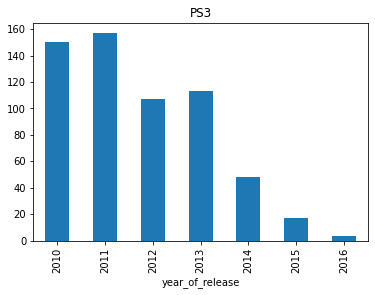

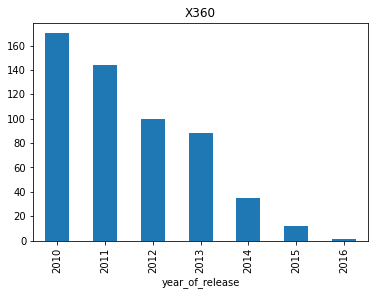

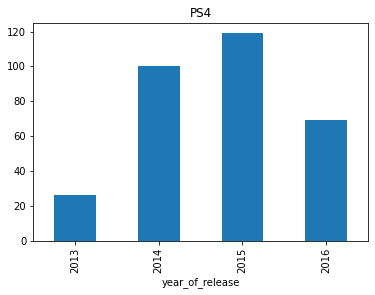

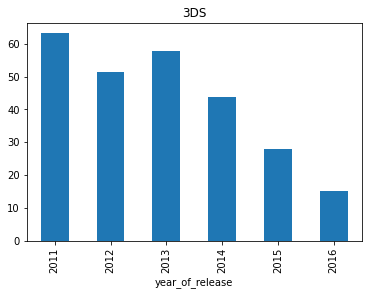

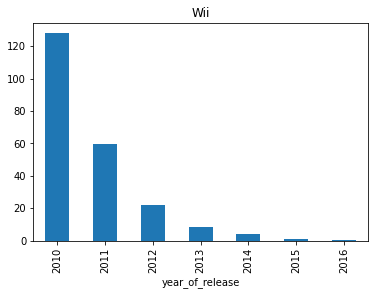

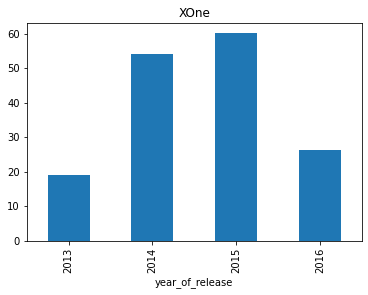

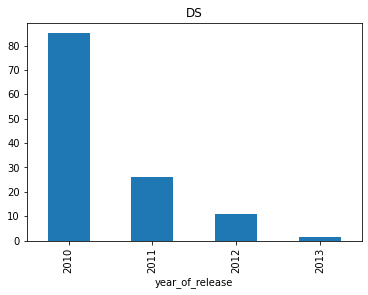

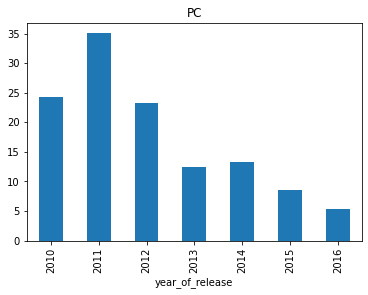

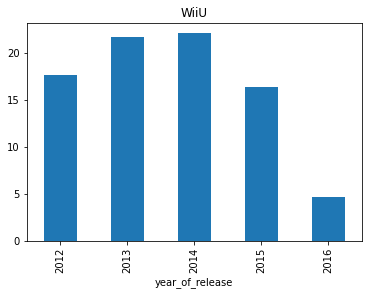

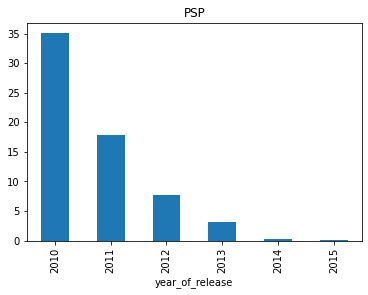

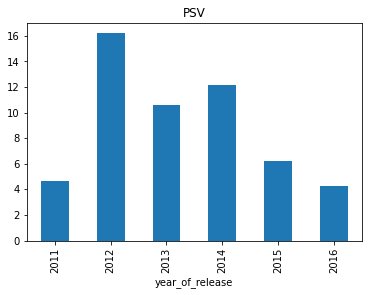

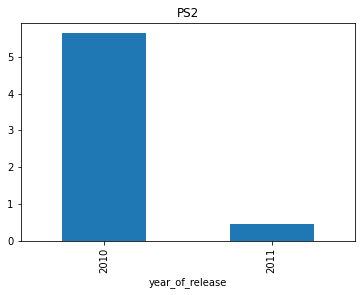

In [58]:
platforms = df_slice.groupby('platform')['total_sales'].sum()\
                   .sort_values(ascending=False).index.values

for platform in platforms:
    plt.figure()
    plt.title(platform)
    df_slice[df_slice['platform'] == platform].groupby('year_of_release')['total_sales'].sum().plot.bar()

Podemos perceber um crescimento nas plataformas: 
* PS4 
* XOne
* WiiU

Obs: sem contar com o ano de 2016 pois o ano não fechou as vendas totais ainda.

Vamos construir um diagrama de caixa para as vendas globais de todos os jogos, divididos por plataforma.

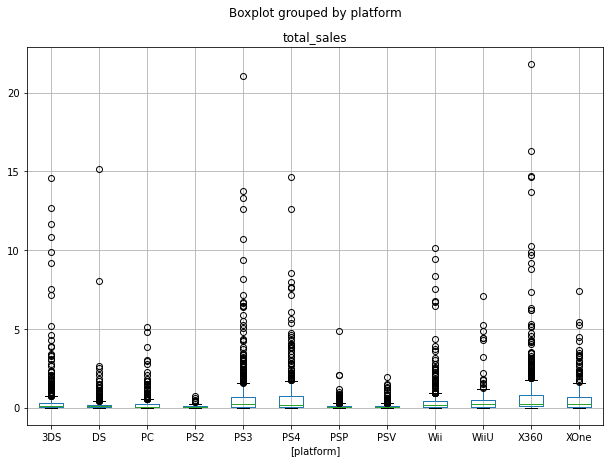

In [59]:
df_slice.groupby(['platform','name'])['total_sales'].sum().reset_index().boxplot(by='platform',figsize=(10,7));

As diferenças nas vendas são significativas, podemos visualizar vários pontos fora da caixa e da barra de erro que podemos considerar como os outliers, provavelmente estão ligadas a jogos mais famosos do momento com muitas vendas (exemplo abaixo): 

In [60]:
df_slice.groupby(['platform','name'])['total_sales'].sum().sort_values(ascending=False).head(15)

platform  name                                     
X360      Kinect Adventures!                           21.82
PS3       Grand Theft Auto V                           21.05
X360      Grand Theft Auto V                           16.27
DS        Pokemon Black/Pokemon White                  15.13
X360      Call of Duty: Modern Warfare 3               14.73
PS4       Call of Duty: Black Ops 3                    14.63
X360      Call of Duty: Black Ops                      14.62
3DS       Pokemon X/Pokemon Y                          14.60
PS3       Call of Duty: Black Ops II                   13.79
X360      Call of Duty: Black Ops II                   13.68
PS3       Call of Duty: Modern Warfare 3               13.33
3DS       Mario Kart 7                                 12.65
PS3       Call of Duty: Black Ops                      12.63
PS4       Grand Theft Auto V                           12.62
3DS       Pokemon Omega Ruby/Pokemon Alpha Sapphire    11.68
Name: total_sales, dtype: float64

E quanto às vendas médias em várias plataformas podemos identificar os valores abaixo:

In [61]:
df_slice.groupby('platform')['total_sales'].mean().sort_values(ascending=False)

platform
X360    0.809426
PS4     0.801378
PS3     0.652133
XOne    0.645020
WiiU    0.559116
3DS     0.498077
Wii     0.495489
PC      0.254614
DS      0.244083
PS2     0.135333
PSP     0.128100
PSV     0.125744
Name: total_sales, dtype: float64

X360, PS4, PS3, XOne e WiiU liderando o top 5.

Podemos verificar como as avaliações de usuários e profissionais afetam as vendas de jogos das plataformas. Abaixo construimos um gráfico de dispersão e calculamos a correlação entre critic_score, user_score e total_sales.

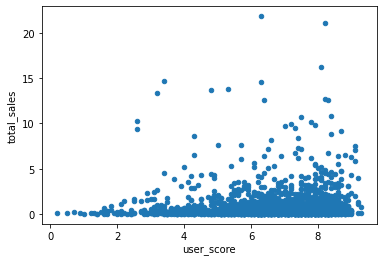

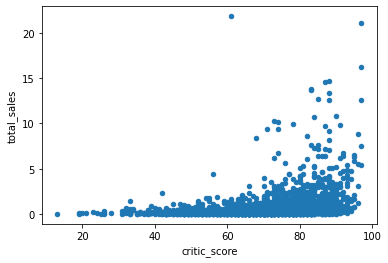

In [62]:
df_slice[df_slice['user_score'] != 'UNK'].astype({'user_score':float})\
    .plot.scatter(x='user_score', y='total_sales');

df_slice[df_slice['critic_score'] != 'UNK'].astype({'critic_score':float})\
    .plot.scatter(x='critic_score', y='total_sales');

In [63]:
df_slice[(df_slice['critic_score']!='UNK') & (df_slice['user_score']!='UNK')]\
        .astype({'critic_score':float,'user_score':float})\
        [['total_sales','user_score','critic_score']].corr()['total_sales']

total_sales     1.000000
user_score      0.056791
critic_score    0.311227
Name: total_sales, dtype: float64

Podemos ver que existe uma correlação de 31% para critic_score em relação ao total de vendas.

Vamos comparar as vendas dos mesmos jogos (mesmo nome), vendido em diferentes plataformas:

In [64]:
#df_slice.groupby(['name','platform'])['total_sales'].sum().reset_index().sort_values('name',ascending=True)

In [65]:
# agrupando os nomes e plataformas e somando o total de vendas.
platform_games = df_slice.groupby(['name','platform'])['total_sales'].sum().reset_index()['name'].value_counts()
# jogos que tem em mais de uma plataforma:
multi_platform_games = platform_games[platform_games > 1].index
multi_platform_games

for game in multi_platform_games:
    print(game)
    print(df_slice[df_slice['name'] == game].groupby('platform')['total_sales'].mean())
    print('---------------------------------')

LEGO Marvel Super Heroes
platform
3DS     0.89
DS      0.38
PC      0.17
PS3     1.83
PS4     1.62
PSV     0.51
WiiU    0.74
X360    2.22
XOne    1.05
Name: total_sales, dtype: float64
---------------------------------
FIFA 14
platform
3DS     0.23
PC      0.40
PS3     6.46
PS4     3.01
PSP     0.19
PSV     0.41
Wii     0.38
X360    4.22
XOne    1.16
Name: total_sales, dtype: float64
---------------------------------
Terraria
platform
3DS     0.09
PC      0.14
PS3     0.41
PS4     0.07
PSV     0.10
WiiU    0.03
X360    0.68
XOne    0.04
Name: total_sales, dtype: float64
---------------------------------
FIFA 15
platform
3DS     0.46
PC      0.29
PS3     4.28
PS4     6.08
PSV     0.60
Wii     0.56
X360    2.92
XOne    2.18
Name: total_sales, dtype: float64
---------------------------------
Angry Birds Star Wars
platform
3DS     0.33
PS3     0.29
PS4     0.22
PSV     0.08
Wii     0.26
WiiU    0.10
X360    0.28
XOne    0.17
Name: total_sales, dtype: float64
-------------------------------

Name: total_sales, dtype: float64
---------------------------------
Skylanders: Spyro's Adventure
platform
3DS     0.57
PC      0.09
PS3     0.94
Wii     2.78
X360    0.97
Name: total_sales, dtype: float64
---------------------------------
Skylanders Imaginators
platform
PS3     0.11
PS4     0.14
WiiU    0.19
X360    0.10
XOne    0.10
Name: total_sales, dtype: float64
---------------------------------
Skylanders Giants
platform
3DS     0.14
PS3     1.05
Wii     2.52
WiiU    0.37
X360    1.30
Name: total_sales, dtype: float64
---------------------------------
Sherlock Holmes: Crimes & Punishments
platform
PC      0.05
PS3     0.07
PS4     0.27
X360    0.05
XOne    0.08
Name: total_sales, dtype: float64
---------------------------------
Cabela's North American Adventures
platform
PS2     0.08
PS3     0.12
PSP     0.10
Wii     0.20
X360    0.11
Name: total_sales, dtype: float64
---------------------------------
The Lord of the Rings: Aragorn's Quest
platform
DS     0.12
PS2    0.06
PS3   

Name: total_sales, dtype: float64
---------------------------------
NBA 2K15
platform
PS3     1.34
PS4     2.45
X360    1.63
XOne    1.73
Name: total_sales, dtype: float64
---------------------------------
Rango: The Video Game
platform
DS      0.11
PS3     0.19
Wii     0.12
X360    0.13
Name: total_sales, dtype: float64
---------------------------------
Deus Ex: Human Revolution
platform
PC      0.58
PS3     1.38
WiiU    0.11
X360    1.37
Name: total_sales, dtype: float64
---------------------------------
Madden NFL 25
platform
PS3     1.87
PS4     0.91
X360    2.23
XOne    0.80
Name: total_sales, dtype: float64
---------------------------------
Rugby Challenge 3
platform
PS3     0.02
PS4     0.05
X360    0.02
XOne    0.01
Name: total_sales, dtype: float64
---------------------------------
Call of Duty: Black Ops II
platform
PC       1.52
PS3     13.79
WiiU     0.41
X360    13.68
Name: total_sales, dtype: float64
---------------------------------
Dragon Ball: XenoVerse
platform
PS3   

Name: total_sales, dtype: float64
---------------------------------
Mass Effect Trilogy
platform
PC      0.27
PS3     0.43
X360    0.40
Name: total_sales, dtype: float64
---------------------------------
Max Payne 3
platform
PC      0.43
PS3     1.84
X360    1.62
Name: total_sales, dtype: float64
---------------------------------
Medal of Honor
platform
PC      0.49
PS3     2.81
X360    2.61
Name: total_sales, dtype: float64
---------------------------------
Medal of Honor: Warfighter
platform
PC      0.33
PS3     1.42
X360    1.15
Name: total_sales, dtype: float64
---------------------------------
Valentino Rossi: The Game
platform
PC      0.01
PS4     0.07
XOne    0.03
Name: total_sales, dtype: float64
---------------------------------
Metal Gear Solid HD Edition
platform
PS3     0.10
PSV     0.39
X360    0.01
Name: total_sales, dtype: float64
---------------------------------
DiRT Rally
platform
PC      0.03
PS4     0.36
XOne    0.13
Name: total_sales, dtype: float64
---------------

platform
PS3     0.57
Wii     6.70
X360    2.37
Name: total_sales, dtype: float64
---------------------------------
ZombiU
platform
PS4     0.06
WiiU    1.01
XOne    0.01
Name: total_sales, dtype: float64
---------------------------------
F1 Race Stars
platform
PC      0.02
PS3     0.31
X360    0.26
Name: total_sales, dtype: float64
---------------------------------
F1 2016 (Codemasters)
platform
PC      0.03
PS4     0.38
XOne    0.12
Name: total_sales, dtype: float64
---------------------------------
F1 2015
platform
PC      0.05
PS4     0.67
XOne    0.25
Name: total_sales, dtype: float64
---------------------------------
F1 2014
platform
PC      0.10
PS3     0.41
X360    0.23
Name: total_sales, dtype: float64
---------------------------------
F1 2012
platform
PC      0.14
PS3     1.03
X360    0.49
Name: total_sales, dtype: float64
---------------------------------
F1 2010
platform
PC      0.06
PS3     1.34
X360    0.88
Name: total_sales, dtype: float64
-------------------------------

Name: total_sales, dtype: float64
---------------------------------
Samurai Warriors 4: Empires
platform
PS3    0.06
PS4    0.10
PSV    0.06
Name: total_sales, dtype: float64
---------------------------------
Steins;Gate: Hiyoku Renri no Darling
platform
PS3     0.02
PSP     0.06
X360    0.08
Name: total_sales, dtype: float64
---------------------------------
The Testament of Sherlock Holmes
platform
PC      0.07
PS3     0.23
X360    0.02
Name: total_sales, dtype: float64
---------------------------------
Cabela's Big Game Hunter 2012
platform
PS3     0.23
Wii     0.37
X360    0.28
Name: total_sales, dtype: float64
---------------------------------
Army of Two: The 40th Day
platform
PS3     0.84
PSP     0.33
X360    0.95
Name: total_sales, dtype: float64
---------------------------------
The Voice
platform
PS3     0.03
WiiU    0.09
X360    0.08
Name: total_sales, dtype: float64
---------------------------------
SpongeBob SquarePants: Plankton's Robotic Revenge
platform
3DS     0.06
Wii

Name: total_sales, dtype: float64
---------------------------------
Wheel of Fortune
platform
DS     0.42
Wii    0.96
Name: total_sales, dtype: float64
---------------------------------
Xblaze: Lost Memories
platform
PS3    0.02
PSV    0.01
Name: total_sales, dtype: float64
---------------------------------
Watch Dogs 2
platform
PS4     1.13
XOne    0.36
Name: total_sales, dtype: float64
---------------------------------
Singularity
platform
PC     0.05
PS3    0.25
Name: total_sales, dtype: float64
---------------------------------
SpongeBob's Surf & Skate Roadtrip
platform
DS      0.12
X360    0.19
Name: total_sales, dtype: float64
---------------------------------
Winning Post 8 2015
platform
PS3    0.02
PSV    0.02
Name: total_sales, dtype: float64
---------------------------------
Winning Post 7 2013
platform
PS3    0.05
PSV    0.02
Name: total_sales, dtype: float64
---------------------------------
Jikkyou Powerful Pro Yakyuu 2014
platform
PS3    0.17
PSV    0.12
Name: total_sales

Name: total_sales, dtype: float64
---------------------------------
International Cricket 2010
platform
PS3     0.19
X360    0.14
Name: total_sales, dtype: float64
---------------------------------
Inversion
platform
PS3     0.07
X360    0.06
Name: total_sales, dtype: float64
---------------------------------
Yaiba: Ninja Gaiden Z
platform
PS3     0.10
X360    0.04
Name: total_sales, dtype: float64
---------------------------------
Strike Witches: Shirogane no Tsubasa
platform
PSP     0.02
X360    0.02
Name: total_sales, dtype: float64
---------------------------------
Hatsune Miku: Project Diva X
platform
PS4    0.04
PSV    0.11
Name: total_sales, dtype: float64
---------------------------------
Grand Kingdom
platform
PS4    0.07
PSV    0.07
Name: total_sales, dtype: float64
---------------------------------
Hatsune Miku: Project Diva F 2nd
platform
PS3    0.25
PSV    0.33
Name: total_sales, dtype: float64
---------------------------------
Grand Slam Tennis 2
platform
PS3     0.23
X36

Name: total_sales, dtype: float64
---------------------------------
NASCAR Heat Evolution
platform
PS4     0.05
XOne    0.03
Name: total_sales, dtype: float64
---------------------------------
NASCAR '14
platform
PS3     0.11
X360    0.17
Name: total_sales, dtype: float64
---------------------------------
Rune Factory: Tides of Destiny
platform
PS3    0.23
Wii    0.20
Name: total_sales, dtype: float64
---------------------------------
MX vs. ATV Supercross Encore
platform
PS4     0.06
XOne    0.02
Name: total_sales, dtype: float64
---------------------------------
Mad Max (2015)
platform
PS4     1.17
XOne    0.48
Name: total_sales, dtype: float64
---------------------------------
Warriors: Legends of Troy
platform
PS3     0.19
X360    0.06
Name: total_sales, dtype: float64
---------------------------------
Shadows of the Damned
platform
PS3     0.27
X360    0.19
Name: total_sales, dtype: float64
---------------------------------
Sesame Street: Ready, Set, Grover!
platform
DS     0.08
W

Name: total_sales, dtype: float64
---------------------------------
Catherine
platform
PS3     0.70
X360    0.31
Name: total_sales, dtype: float64
---------------------------------
Castlevania: Lords of Shadow - Reverie
platform
PS3     0.03
X360    0.02
Name: total_sales, dtype: float64
---------------------------------
Castlevania: Lords of Shadow
platform
PS3     1.10
X360    0.65
Name: total_sales, dtype: float64
---------------------------------
BlazBlue: Chrono Phantasma
platform
PS3    0.31
PSV    0.07
Name: total_sales, dtype: float64
---------------------------------
DiRT Showdown
platform
PS3     0.17
X360    0.23
Name: total_sales, dtype: float64
---------------------------------
Devil May Cry HD Collection
platform
PS3     0.81
X360    0.43
Name: total_sales, dtype: float64
---------------------------------
Atelier Ayesha: The Alchemist of Dusk
platform
PS3    0.26
PSV    0.05
Name: total_sales, dtype: float64
---------------------------------
Birds of Steel
platform
PS3   

Name: total_sales, dtype: float64
---------------------------------
Fantasia: Music Evolved
platform
X360    0.08
XOne    0.15
Name: total_sales, dtype: float64
---------------------------------
 Frozen: Olaf's Quest
platform
3DS    0.59
DS     0.51
Name: total_sales, dtype: float64
---------------------------------
Dragon Ball: Xenoverse 2
platform
PS4     0.7
XOne    0.2
Name: total_sales, dtype: float64
---------------------------------
Battle vs. Chess
platform
PS3     0.04
X360    0.02
Name: total_sales, dtype: float64
---------------------------------
Clash of the Titans
platform
PS3     0.30
X360    0.16
Name: total_sales, dtype: float64
---------------------------------
Dragon Ball: Raging Blast 2
platform
PS3     0.80
X360    0.64
Name: total_sales, dtype: float64
---------------------------------
3rd Super Robot Wars Z Jigoku Hen
platform
PS3    0.23
PSV    0.19
Name: total_sales, dtype: float64
---------------------------------
Dragon's Dogma
platform
PS3     1.74
X360    0.

Podemos perceber uma diferença de vendas dos mesmos jogos de plataforma para plataforma.

Podemos também visualizar a distribuição geral de jogos por gênero:

In [66]:
df_slice.groupby('genre')['total_sales'].sum().sort_values(ascending=False)

genre
Action          677.21
Shooter         480.06
Sports          329.04
Role-Playing    315.63
Misc            236.49
Racing          123.59
Platform        120.20
Fighting         81.59
Simulation       72.31
Adventure        61.12
Strategy         36.01
Puzzle           20.75
Name: total_sales, dtype: float64

Podemos perceber que jogos de Action e Shooter são os mais lucrativos, em seguido Sports e Roler_playing.

In [67]:
df_slice.groupby(['genre','rating'])['total_sales'].sum().sort_values(ascending=False)

genre         rating
Shooter       M         369.54
Action        M         293.65
Sports        E         236.83
Role-Playing  UNK       134.72
Action        E10+      113.83
              UNK       111.45
              T         103.52
Role-Playing  M         102.38
Platform      E          79.64
Misc          E          74.35
Racing        E          71.93
Misc          E10+       71.07
              UNK        58.08
Role-Playing  T          56.94
Action        E          54.31
Shooter       UNK        49.91
Fighting      T          45.60
Shooter       T          44.71
Sports        UNK        36.99
Misc          T          30.38
Simulation    E          30.07
Sports        E10+       28.41
              T          26.81
Adventure     UNK        26.53
Platform      E10+       24.83
Racing        UNK        21.33
Fighting      UNK        21.07
Simulation    T          20.12
Adventure     M          20.04
Simulation    UNK        19.06
Racing        E10+       18.26
Shooter       E10+

Podemos perceber também diferenças nas vendas devido a classificação ESRB.

**Perfil de usuário para cada região:**

A seguir faremos um perfil de Usuário para cada reginão (AN, UE, JP):

- As cinco plataformas principais. 
- Os cinco principais gêneros.
- As classificações do ESRB e se afetam as vendas em regiões individuais.

In [68]:
regions=['na_sales','eu_sales','jp_sales']
for region in regions:
    print(df_slice.groupby('platform')[region].sum().sort_values(ascending=False).reset_index().head())
    print('-----------------------------')
# para cada região agrupamos as plataformas e somamos os valores das vendas de cada uma delas.

  platform  na_sales
0     X360    334.18
1      PS3    232.61
2      Wii    121.20
3      PS4    108.74
4     XOne     93.12
-----------------------------
  platform  eu_sales
0      PS3    216.68
1     X360    163.41
2      PS4    141.09
3       PC     68.82
4      Wii     65.91
-----------------------------
  platform  jp_sales
0      3DS    100.67
1      PS3     60.04
2      PSP     42.20
3       DS     27.90
4      PSV     21.91
-----------------------------


Norte Americanos lideram em vendas jogos de X360, Europa lidera em vendas jogos de PS3, Japão lidera em jogos 3DS.

In [69]:
regions=['na_sales','eu_sales','jp_sales']
for region in regions:
    print(df_slice.groupby('genre')[region].sum().sort_values(ascending=False).reset_index().head())
    print('-----------------------------')

          genre  na_sales
0        Action    292.16
1       Shooter    237.68
2        Sports    156.97
3          Misc    125.04
4  Role-Playing    112.16
-----------------------------
          genre  eu_sales
0        Action    235.08
1       Shooter    171.51
2        Sports    117.19
3  Role-Playing     75.53
4          Misc     66.53
-----------------------------
          genre  jp_sales
0  Role-Playing    103.70
1        Action     72.84
2          Misc     24.29
3      Platform     15.81
4     Adventure     15.69
-----------------------------


Quanto a preferencia por tipos de jogos (generos diferentes), os norte americanos e europeus preferem Action, Shooter e Sports (nesta ordem), enquanto os Japoneses preferem Role_Playling, Action e Misc no top 3. 

In [70]:
regions=['na_sales','eu_sales','jp_sales']
for region in regions:
    print(df_slice.groupby('rating')[region].sum().sort_values(ascending=False).reset_index().head())
    print('-----------------------------')

  rating  na_sales
0      M    383.10
1      E    271.56
2      T    162.83
3   E10+    160.00
4    UNK    156.10
-----------------------------
  rating  eu_sales
0      M    292.79
1      E    197.55
2    UNK    139.77
3      T    114.05
4   E10+    100.36
-----------------------------
  rating  jp_sales
0    UNK    171.63
1      E     47.87
2      T     42.22
3      M     31.10
4   E10+     13.22
-----------------------------


Os norte americanos e europeus lideram em jogos com classificação M (adulto), enquanto os dados dos japoneses não é possível distinguir devido a alto valores de UNK, tendo em segundo jogos de classificação livre.

## Testando as hipóteses <a id='teste'></a>

Vamos testar algumas hipóteses a seguir:

1. As classificações médias dos usuários das plataformas Xbox One e PC são as mesmas.

* Hipótese nula: as classificações médias dos usuários é a mesma para as plataformas Xbox One e PC.

* Hipótese alternativa: As classificações médias dos usuários das plataformas Xbox One e PC são diferentes.

In [71]:
df_xbox_one = df_slice[(df_slice['platform'] == 'XOne') & (df_slice['user_score'] != 'UNK')]['user_score']
df_pc = df_slice[(df_slice['platform'] == 'PC') & (df_slice['user_score'] != 'UNK')]['user_score']

alpha = 0.05

p_val = ttest_ind(df_xbox_one, df_pc).pvalue

if p_val < alpha:
    print('Podemos rejeitar a hipotese nula.') # são diferentes
else:
    print('Não podemos rejeitar a hipotese nula.') # não tem diferença significativa

Não podemos rejeitar a hipotese nula.


Conclusão: As classificações médias dos usuários é a mesma para as plataformas Xbox One e PC.

2. As classificações médias de usuários para os gêneros Action (ação) e Sports (esportes) são diferentes.

* Hipótese nula: As classificações médias dos usuários é a mesma para os generos esportes e ação.

* Hipótese alternativa: As classificações médias dos usuários das plataformas esportes e ação são diferentes.

In [72]:
df_action = df_slice[(df_slice['genre'] == 'Action') & (df_slice['user_score'] != 'UNK')]['user_score']
df_sports = df_slice[(df_slice['genre'] == 'Sports') & (df_slice['user_score'] != 'UNK')]['user_score']

alpha = 0.05

p_val = ttest_ind(df_action, df_sports).pvalue

if p_val < alpha:
    print('Podemos rejeitar a hipotese nula.') # são diferentes
else:
    print('Não podemos rejeitar a hipotese nula.') # não tem diferença significativa

Podemos rejeitar a hipotese nula.


Conclusão: As classificações médias dos usuários das plataformas esportes e ação são diferentes.

**Top 5 dos jogos mais rentáveis das plataformas:**

*Abaixo temos o Top 5 dos jogos mais rentáveis das plataformas identificadas que estão crescendo*

In [73]:
PS4 = df_slice[df_slice['platform'] == 'PS4']
PS4.groupby('name')['total_sales'].sum().sort_values(ascending=False)

name
Call of Duty: Black Ops 3         14.63
Grand Theft Auto V                12.62
FIFA 16                            8.58
Star Wars Battlefront (2015)       7.98
Call of Duty: Advanced Warfare     7.66
                                  ...  
Prototype: Biohazard Bundle        0.01
Professional Farmer 2016           0.01
Chaos;Child                        0.01
Carmageddon: Max Damage            0.01
Dungeons 2                         0.01
Name: total_sales, Length: 392, dtype: float64

* Mais rentáveis da plataforma 'PS4':


1. Call of Duty: Black Ops 3         
2. Grand Theft Auto V                
3. FIFA 16                           
4. Star Wars Battlefront (2015)
5. Call of Duty: Advanced Warfare  

In [74]:
XOne = df_slice[df_slice['platform'] == 'XOne']
XOne.groupby('name')['total_sales'].sum().sort_values(ascending=False)

name
Call of Duty: Black Ops 3            7.39
Grand Theft Auto V                   5.47
Call of Duty: Advanced Warfare       5.26
Halo 5: Guardians                    4.49
Fallout 4                            4.22
                                     ... 
Ride 2                               0.01
Rocksmith 2014 Edition Remastered    0.01
Rugby Challenge 3                    0.01
Rugby League Live 3                  0.01
Mark McMorris Infinite Air           0.01
Name: total_sales, Length: 247, dtype: float64

* Mais rentáveis da plataforma 'XOne':


1. Call of Duty: Black Ops 3         
2. Grand Theft Auto V                
3. Call of Duty: Advanced Warfare                           
4. Halo 5: Guardians
5. Fallout 4  

In [75]:
WiiU = df_slice[df_slice['platform'] == 'WiiU']
WiiU.groupby('name')['total_sales'].sum().sort_values(ascending=False)

name
Mario Kart 8                            7.09
New Super Mario Bros. U                 5.23
Super Smash Bros. for Wii U and 3DS     4.87
Splatoon                                4.44
Nintendo Land                           4.42
                                        ... 
Barbie and Her Sisters Puppy Rescue     0.01
Fast Racing Neo                         0.01
The Book of Unwritten Tales 2           0.01
Legend of Kay Anniversary               0.01
Mario vs. Donkey Kong: Tipping Stars    0.01
Name: total_sales, Length: 147, dtype: float64

* Mais rentáveis da plataforma 'WiiU':


1. Mario Kart 8        
2. New Super Mario Bros. U                
3. Super Smash Bros. for Wii U and 3DS                           
4. Splatoon
5. Nintendo Land  

## Conclusão geral <a id='conclusao'></a>

Neste projeto, verificamos dados de vendas de jogos em diferentes plataformas em várias regiões do mundo, identificamos plataformas rentáveis e que provavelmente continuaram a subir no próximo ano (2017), são elas: 
    
* PS4
* XOne
* WiiU

Também identificamos os jogos mais vendidos de cada uma dessas plataformas.